In [2]:
# Original coding process

import sqlite3
import pandas as pd

# Connecting to the database
conn = sqlite3.connect('/Users/diboshbaruah/Desktop/Database.db')
data = pd.read_sql_query('SELECT * FROM New_Delhi_Reviews', conn)

print("Dataset successfully loaded...\n")
# Display the first few rows to inspect the data
print("Displaying first few rows of the dataset:\n")
print(data.head())

# Checking data types before conversion
print("\nData types before conversion:")
print(data.dtypes)

# Closing the connection
conn.close()

Dataset successfully loaded...

Displaying first few rows of the dataset:

  rating_review                                        review_full
0             5  Totally in love with the Auro of the place, re...
1             5  I went this bar 8 days regularly with my husba...
2             5  We were few friends and was a birthday celebra...
3             5  Fatjar Cafe and Market is the perfect place fo...
4             5  Hey Guys, if you are craving for pizza and sea...

Data types before conversion:
rating_review    object
review_full      object
dtype: object


In [4]:
import re
import nltk

# Downloading necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Removing URLs from the 'review_full' column
data['cleaned_review'] = data['review_full'].str.replace(r'http\S+', '', regex=True)

# Removing special characters and numbers from the 'cleaned_review' column
data['cleaned_review'] = data['cleaned_review'].str.replace(r'[^A-Za-z\s]', '', regex=True)

# Converting the 'cleaned_review' column to lowercase
data['cleaned_review'] = data['cleaned_review'].str.lower()

# Printing some cleaned reviews
print("Cleaned Review Examples:")
print(data['cleaned_review'].head())


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/diboshbaruah/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/diboshbaruah/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Cleaned Review Examples:
0    totally in love with the auro of the place rea...
1    i went this bar  days regularly with my husban...
2    we were few friends and was a birthday celebra...
3    fatjar cafe and market is the perfect place fo...
4    hey guys if you are craving for pizza and sear...
Name: cleaned_review, dtype: object


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating a TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.9, min_df=5)

# Fitting the vectorizer on the cleaned reviews and transform the data
X = vectorizer.fit_transform(data['cleaned_review'])

# Checking the shape of the resulting TF-IDF matrix 
print("TF-IDF matrix shape:", X.shape)

# Optionally, checking the feature names
print("\nFeature names (terms) extracted by TF-IDF:")

# Displaying the first 20 terms for inspection
print(vectorizer.get_feature_names_out()[:20])  


TF-IDF matrix shape: (147581, 24027)

Feature names (terms) extracted by TF-IDF:
['aa' 'aachar' 'aachari' 'aad' 'aadmi' 'aagya' 'aah' 'aahgya' 'aaj'
 'aakash' 'aalo' 'aalok' 'aaloo' 'aalu' 'aam' 'aamodini' 'aampanna'
 'aamras' 'aan' 'aanch']


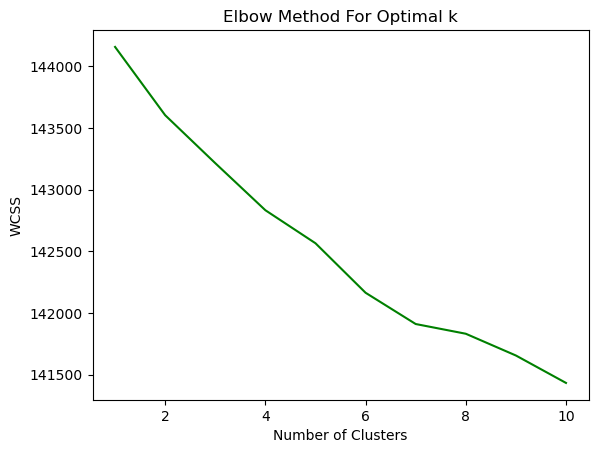

In [44]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Using elbow method to find the optimal number of clusters
wcss = []  # Within-cluster sum of squares (WCSS)
for k in range(1, 11):  # Trying values of k from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # The WCSS is the inertia

# Plotting the Elbow curve
plt.plot(range(1, 11), wcss, color='g')  
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()



In [10]:
# Applying K-Means clustering (assuming 4 clusters)
kmeans = KMeans(n_clusters=4, random_state=42)
data['cluster'] = kmeans.fit_predict(X)

# Inspecting the cluster distribution
print("\nCluster Distribution:")
print(data['cluster'].value_counts())



Cluster Distribution:
cluster
0    86243
1    26215
3    18120
2    17003
Name: count, dtype: int64


In [12]:
import numpy as np

# Getting the feature names (terms) from the TF-IDF vectorizer
terms = vectorizer.get_feature_names_out()

# Function to get the top words in each cluster
def get_top_words(cluster_centers, terms, num_words=10):
    top_words = []
    for i in range(cluster_centers.shape[0]):
        top_indices = cluster_centers[i].argsort()[-num_words:][::-1]  # Getting indices of top words
        top_words.append([terms[index] for index in top_indices])
    return top_words

# Getting top words for each cluster
top_words = get_top_words(kmeans.cluster_centers_, terms)

# Displaying the top words for each cluster
for i, words in enumerate(top_words):
    print(f"\nTop words for cluster {i}:")
    print(", ".join(words))



Top words for cluster 0:
food, place, restaurant, service, indian, best, delhi, good, visit, staff

Top words for cluster 1:
good, food, place, nice, service, restaurant, ambience, really, staff, quality

Top words for cluster 2:
chicken, butter, place, food, good, tikka, ordered, try, paneer, mutton

Top words for cluster 3:
great, food, service, place, ambience, staff, good, restaurant, amazing, experience


In [16]:
# Installing textblob
pip install textblob


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 5.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [20]:
# Importing nltk library
import nltk
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/diboshbaruah/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/diboshbaruah/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/diboshbaruah/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
from textblob import TextBlob

# Function to get sentiment polarity (positive if >0, negative if <0, neutral if 0)
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Applying sentiment analysis to each review
data['sentiment'] = data['review_full'].apply(get_sentiment)

# Assigning sentiment labels (positive, neutral, negative)
data['sentiment_label'] = data['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Grouping by cluster and calculating sentiment distribution
cluster_sentiment = data.groupby('cluster')['sentiment_label'].value_counts()
print("\nSentiment Distribution Across Clusters:")
print(cluster_sentiment)



Sentiment Distribution Across Clusters:
cluster  sentiment_label
0        positive           78461
         negative            6729
         neutral             1053
1        positive           25930
         negative             272
         neutral               13
2        positive           14532
         negative            2428
         neutral               43
3        positive           18015
         negative             102
         neutral                3
Name: count, dtype: int64


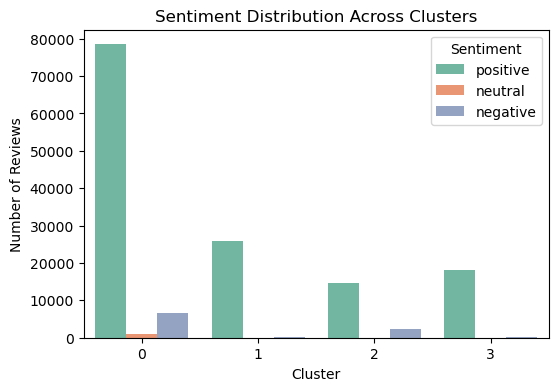

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting sentiment distribution by cluster
plt.figure(figsize=(6, 4))
sns.countplot(x='cluster', hue='sentiment_label', data=data, palette='Set2') 
plt.title('Sentiment Distribution Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Reviews')
plt.legend(title='Sentiment', loc='upper right')
plt.show()

In [58]:
# Mapping clusters to their labels
cluster_labels = {
    0: "Mixed Experience with Room for Improvement",
    1: "Highly Positive Dining Experience",
    2: "Dish-Specific Reviews with Some Dissatisfaction",
    3: "Outstanding Experience with Excellent Service"
}

# Assigning labels to the clusters in the dataset
data['cluster_label'] = data['cluster'].map(cluster_labels)

# Showing the first 20 rows for review
print(data[['cluster', 'cluster_label']].head(20))


    cluster                                    cluster_label
0         0       Mixed Experience with Room for Improvement
1         0       Mixed Experience with Room for Improvement
2         1                Highly Positive Dining Experience
3         0       Mixed Experience with Room for Improvement
4         0       Mixed Experience with Room for Improvement
5         2  Dish-Specific Reviews with Some Dissatisfaction
6         0       Mixed Experience with Room for Improvement
7         0       Mixed Experience with Room for Improvement
8         0       Mixed Experience with Room for Improvement
9         0       Mixed Experience with Room for Improvement
10        1                Highly Positive Dining Experience
11        0       Mixed Experience with Room for Improvement
12        0       Mixed Experience with Room for Improvement
13        0       Mixed Experience with Room for Improvement
14        0       Mixed Experience with Room for Improvement
15        3    Outstandi

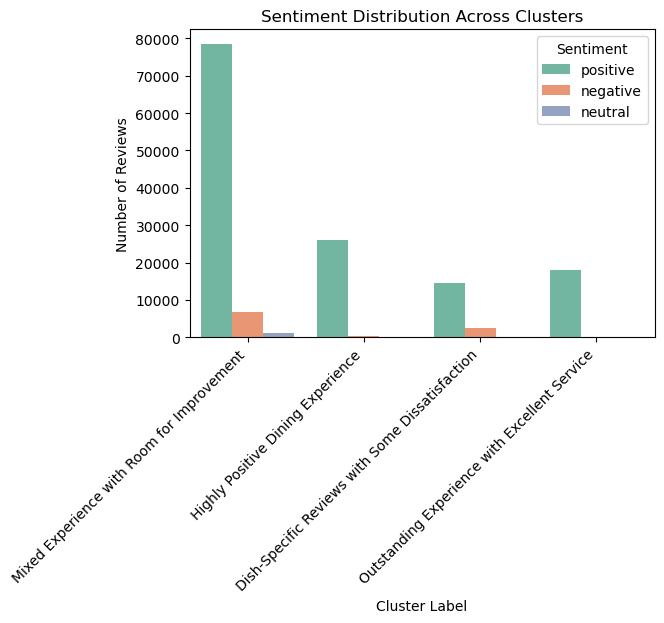

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting sentiment distribution across clusters
plt.figure(figsize=(6, 4))
sns.countplot(x='cluster_label', hue='sentiment_label', data=data, palette='Set2')  
plt.title('Sentiment Distribution Across Clusters')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.show()


In [34]:
# We can do group by and then sample directly
sample_reviews = data.groupby('cluster_label').head(3)  

# Displaying the sampled reviews
print(sample_reviews[['cluster_label', 'review_full']])


                                       cluster_label  \
0         Mixed Experience with Room for Improvement   
1         Mixed Experience with Room for Improvement   
2                  Highly Positive Dining Experience   
3         Mixed Experience with Room for Improvement   
5    Dish-Specific Reviews with Some Dissatisfaction   
10                 Highly Positive Dining Experience   
15     Outstanding Experience with Excellent Service   
19                 Highly Positive Dining Experience   
23     Outstanding Experience with Excellent Service   
27     Outstanding Experience with Excellent Service   
70   Dish-Specific Reviews with Some Dissatisfaction   
128  Dish-Specific Reviews with Some Dissatisfaction   

                                           review_full  
0    Totally in love with the Auro of the place, re...  
1    I went this bar 8 days regularly with my husba...  
2    We were few friends and was a birthday celebra...  
3    Fatjar Cafe and Market is the perfect 

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

# Filtering positive and negative reviews from a specific cluster (e.g., Cluster 0)
cluster_0_reviews = data[data['cluster_label'] == 'Mixed Experience with Room for Improvement']

# Positive and negative reviews
positive_reviews = cluster_0_reviews[cluster_0_reviews['sentiment_label'] == 'positive']['review_full']
negative_reviews = cluster_0_reviews[cluster_0_reviews['sentiment_label'] == 'negative']['review_full']

# Initializing CountVectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=10)  # Top 10 words

# Fitting on positive reviews
positive_words = vectorizer.fit_transform(positive_reviews)
positive_word_freq = pd.DataFrame(positive_words.toarray(), columns=vectorizer.get_feature_names_out())

# Fitting on negative reviews
negative_words = vectorizer.fit_transform(negative_reviews)
negative_word_freq = pd.DataFrame(negative_words.toarray(), columns=vectorizer.get_feature_names_out())

# Displaying top words for positive and negative reviews
print("Top Words in Positive Reviews (Cluster 0):")
print(positive_word_freq.sum().sort_values(ascending=False).head())

print("\nTop Words in Negative Reviews (Cluster 0):")
print(negative_word_freq.sum().sort_values(ascending=False).head())


Top Words in Positive Reviews (Cluster 0):
food          68029
place         42480
restaurant    29573
good          29226
service       25950
dtype: int64

Top Words in Negative Reviews (Cluster 0):
food          6131
place         3384
service       2737
restaurant    2730
staff         1518
dtype: int64


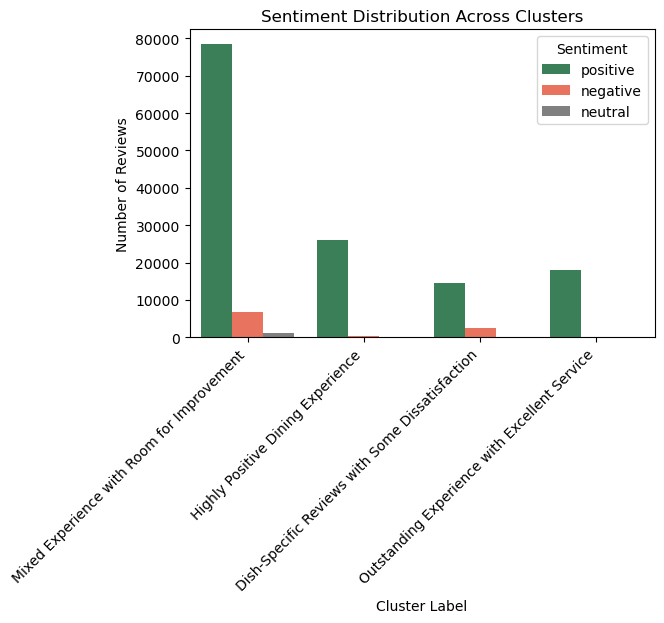

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Defining custom colors for positive, negative, and neutral sentiments
custom_palette = ['#2E8B57', '#FF6347', '#808080']  # Green for positive, Red for negative, Gray for neutral

# Plotting sentiment distribution across clusters with custom colors
plt.figure(figsize=(6, 4))
sns.countplot(x='cluster_label', hue='sentiment_label', data=data, palette=custom_palette)
plt.title('Sentiment Distribution Across Clusters')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.show()
